# Experimentación con ScikitLearn

Vamos a realizar un proceso de aprendizaje y experimentación con la libreria ScikitLearn. (basado en el curso NLP modelos y algoritmos de la universidad Austral)

en este caso vamos a practicar lo aprendido en cada modulo del curso.

In [2]:

from nltk.corpus import stopwords
from nltk import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

In [3]:
def leer_texto(path_archivo):
    
    """obtiene un string con el texto completro de un archivo

    Returns:
        _string_: 
        string: texto de un archivos
    """

    text = ''
    
    archivo = open(path_archivo, 'r', encoding='utf8')

    while(True):
        linea = archivo.readline()
        text = text+linea
        if not linea:
            break
    
    archivo.close
    
    return text

In [4]:
#importamos los archivos con los que vamos a trabajar

path_petro = './archivos/petro_clean.pdf.txt'
path_fajardo = './archivos/fajardo_clean.pdf.txt'
path_rodolfo = './archivos/rodolfo_clean.pdf.txt'

texto_petro = leer_texto(path_petro)
texto_fajardo = leer_texto(path_fajardo)
texto_rodolfo = leer_texto(path_rodolfo)

In [5]:
#Creamos el corpus de nuestro proceso
corpus =[texto_petro,
         texto_fajardo,
         texto_rodolfo]

In [6]:
#crea el count vectorizer

count_vectorizer = CountVectorizer(analyzer='word',
                                   decode_error='ignore',
                                   encoding='str',
                                   lowercase=True,
                                   stop_words=stopwords.words('spanish'),
                                   strip_accents='ascii',
                                   min_df=2,
                                   max_features=40)

In [7]:

data_vectorized = count_vectorizer.fit_transform(corpus)


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['eramos', 'estabamos', 'estais', 'estan', 'estara', 'estaran', 'estaras', 'estare', 'estareis', 'estaria', 'estariais', 'estariamos', 'estarian', 'estarias', 'esteis', 'esten', 'estes', 'estuvieramos', 'estuviesemos', 'fueramos', 'fuesemos', 'habeis', 'habia', 'habiais', 'habiamos', 'habian', 'habias', 'habra', 'habran', 'habras', 'habre', 'habreis', 'habria', 'habriais', 'habriamos', 'habrian', 'habrias', 'hayais', 'hubieramos', 'hubiesemos', 'mas', 'mia', 'mias', 'mio', 'mios', 'seais', 'sera', 'seran', 'seras', 'sere', 'sereis', 'seria', 'seriais', 'seriamos', 'serian', 'serias', 'si', 'tambien', 'tendra', 'tendran', 'tendras', 'tendre', 'tendreis', 'tendria', 'tendriais', 'tendriamos', 'tendrian', 'tendrias', 'teneis', 'tengais', 'tenia', 'teniais', 'teniamos', 'tenian', 'tenias', 'tuv

In [8]:
data_dtm = pd.DataFrame(data_vectorized.toarray(), columns=count_vectorizer.get_feature_names())

/opt/homebrew/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [9]:
data_dtm

,acceso,asi,calidad,cambio,colombia,condiciones,debe,derechos,desarrollo,economia,...,recursos,salud,sector,sera,servicios,sistema,social,trabajo,traves,vida
0,52,45,29,43,60,43,11,68,34,86,...,14,70,22,54,30,92,62,59,31,108
1,12,8,18,24,48,7,7,18,44,4,...,17,26,25,12,20,25,17,16,20,15
2,28,32,46,17,116,32,69,19,71,17,...,50,51,56,17,43,52,52,35,38,40


<AxesSubplot:>

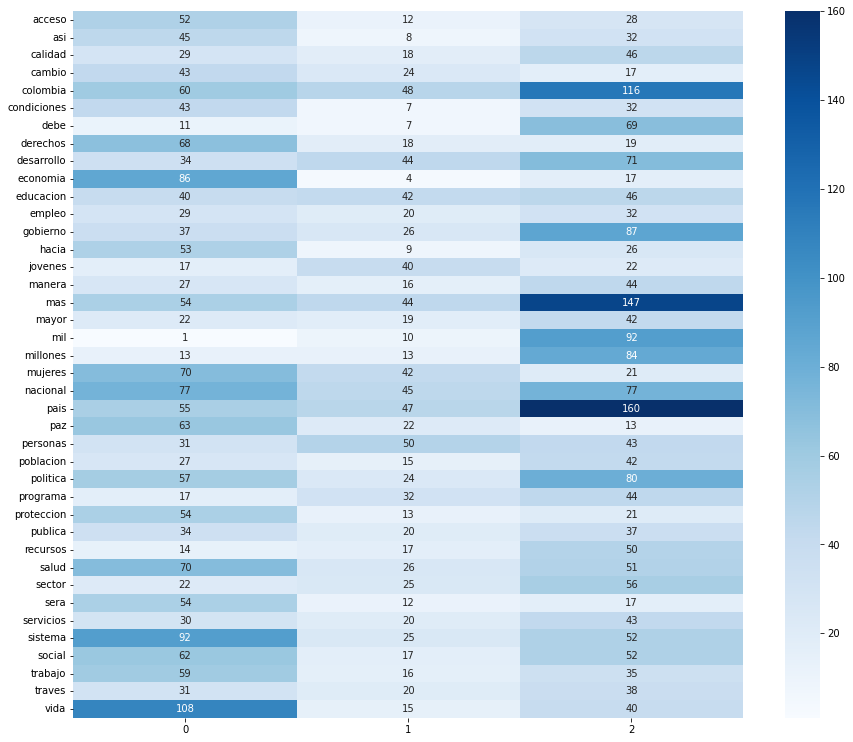

In [10]:
plt.figure(figsize=(15,13))
sns.heatmap(data_dtm.transpose(),
            annot=True,
            cmap="Blues", 
            fmt="d")


# Experimentación con Spacy

vamos a experimentar con la libreria de NLP Spacy que ofrece metodos avanzados para el procesamiento de documentos.

In [87]:
from spacy.lang.es import Spanish
import spacy

lis_ents_petro =[]

nlp_md = spacy.load('es_core_news_md')

petro_txt = leer_texto('./archivos/petro_clean.pdf.txt')
fajardo_txt = leer_texto('./archivos/fajardo_clean.pdf.txt')
rodolfo_txt = leer_texto('./archivos/rodolfo_clean.pdf.txt')

#Creamos los objetos Doc de cada uno de los archivos de planes de gobierno
doc_petro = nlp_md(texto_petro)
doc_fajardo = nlp_md(texto_fajardo)
doc_rodolfo = nlp_md(texto_rodolfo)

# Busqueda con spacy

Se puede usar spacy para buscar contenido basado en reglas dentro de los documentos. a continuación se explica el procedimiento.

- crear un objeto Matcher con el vocab del documento
- crear un diccionario con el patron de busqueda
- agregar el o los patrones de busqueda al matcher
- usar el objeto matcher para buscar las coincidencias 

In [109]:
from spacy.matcher import Matcher

#vamos a crear un objeto matcher por cada documento

mth_petro = Matcher(doc_petro.vocab)
mth_fajardo = Matcher(doc_fajardo.vocab)
mth_rodolfo = Matcher(doc_rodolfo.vocab)

#creamos los patrones de busqueda de interes

ptt_ref_tributaria = [{'TEXT':'reforma'}, 
                      {'TEXT':'tributaria'}]

ptt_ref_pensional = [{'TEXT':'reforma'}, 
                      {'TEXT':'pensional'}]

ptt_ref_policial = [{'TEXT':'reforma'}, 
                      {'TEXT':'policial'}]

ptt_ref_salud    = [{'TEXT':'reforma'}, 
                    {'TEXT':'salud'}]

ptt_paz    = [{'TEXT':'paz'}]

ptt_choco =  [{'TEXT':'chocó'}]

mth_petro.add('reformas', [ptt_ref_tributaria, 
                           ptt_ref_pensional,
                           ptt_ref_policial,
                           ptt_choco, 
                           ptt_paz])

mth_fajardo.add('reformas', [ptt_ref_tributaria, 
                             ptt_ref_pensional,
                             ptt_ref_policial,
                             ptt_choco,
                             ptt_paz])

mth_rodolfo.add('reformas', [ptt_ref_tributaria, 
                             ptt_ref_pensional,
                             ptt_ref_policial,
                             ptt_choco,
                             ptt_paz])

#Ahora buscamos las coincidencias dentro de cada documento

matches_petro = mth_petro(doc_petro)
matches_fajardo = mth_petro(doc_fajardo)
matches_rodolfo = mth_petro(doc_rodolfo)


In [110]:
#Resultados de coincidencia para petro
for match_id, start, end in matches_petro:
    string_id = doc_petro.vocab.strings[match_id]
    span = doc_petro[start:end]
    
    print(match_id, string_id, start, end, span.text)

13007791884884920679 reformas 55 56 paz
13007791884884920679 reformas 278 279 paz
13007791884884920679 reformas 305 306 paz
13007791884884920679 reformas 469 470 paz
13007791884884920679 reformas 481 482 paz
13007791884884920679 reformas 491 492 paz
13007791884884920679 reformas 503 504 paz
13007791884884920679 reformas 574 575 paz
13007791884884920679 reformas 660 661 paz
13007791884884920679 reformas 1150 1151 chocó
13007791884884920679 reformas 1271 1272 paz
13007791884884920679 reformas 1342 1343 paz
13007791884884920679 reformas 1688 1689 paz
13007791884884920679 reformas 1729 1730 paz
13007791884884920679 reformas 1790 1791 paz
13007791884884920679 reformas 2782 2783 paz
13007791884884920679 reformas 2838 2839 paz
13007791884884920679 reformas 6142 6143 paz
13007791884884920679 reformas 6230 6231 paz
13007791884884920679 reformas 6692 6693 paz
13007791884884920679 reformas 11625 11626 paz
13007791884884920679 reformas 12038 12039 paz
13007791884884920679 reformas 12264 12265 paz


In [111]:
#Resultados de coincidencia para fajardo
for match_id, start, end in matches_fajardo:
    string_id = doc_fajardo.vocab.strings[match_id]
    span = doc_fajardo[start:end]
    
    print(match_id, string_id, start, end, span.text)

13007791884884920679 reformas 81 82 paz
13007791884884920679 reformas 144 145 paz
13007791884884920679 reformas 651 652 paz
13007791884884920679 reformas 6610 6612 reforma pensional
13007791884884920679 reformas 7028 7030 reforma tributaria
13007791884884920679 reformas 8333 8334 paz
13007791884884920679 reformas 8339 8340 paz
13007791884884920679 reformas 8440 8441 paz
13007791884884920679 reformas 8486 8487 paz
13007791884884920679 reformas 8543 8544 paz
13007791884884920679 reformas 8553 8554 paz
13007791884884920679 reformas 8972 8973 paz
13007791884884920679 reformas 13583 13584 paz
13007791884884920679 reformas 13612 13613 paz
13007791884884920679 reformas 13877 13878 paz
13007791884884920679 reformas 13891 13892 chocó
13007791884884920679 reformas 15419 15420 paz
13007791884884920679 reformas 16407 16408 paz
13007791884884920679 reformas 16410 16411 paz
13007791884884920679 reformas 16417 16418 paz
13007791884884920679 reformas 16425 16426 paz
13007791884884920679 reformas 16461

In [112]:
#Resultados de coincidencia para petro
for match_id, start, end in matches_rodolfo:
    string_id = doc_rodolfo.vocab.strings[match_id]
    span = doc_rodolfo[start:end]
    
    print(match_id, string_id, start, end, span.text)

13007791884884920679 reformas 81 82 paz
13007791884884920679 reformas 221 222 paz
13007791884884920679 reformas 234 235 paz
13007791884884920679 reformas 558 559 paz
13007791884884920679 reformas 815 816 paz
13007791884884920679 reformas 6040 6041 paz
13007791884884920679 reformas 6268 6269 paz
13007791884884920679 reformas 11876 11877 paz
13007791884884920679 reformas 22405 22406 paz
13007791884884920679 reformas 22630 22631 paz
13007791884884920679 reformas 23930 23931 paz
13007791884884920679 reformas 24237 24238 paz
13007791884884920679 reformas 25843 25844 paz
13007791884884920679 reformas 28922 28924 reforma tributaria
13007791884884920679 reformas 29184 29186 reforma pensional


### Comparación de documentos

Ahora probaremos la funcionalidad de comparación de similutd de documentos que ofrece spacy

In [108]:
print(doc_petro.similarity(doc_rodolfo))

0.9683489454855204
